In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('University_ranking.csv')
df.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [3]:
df.tail()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015
2199,1000,China Pharmaceutical University,China,83,367,567,218,861,991,812,981.0,547,44.02,2015


In [5]:
df.shape

(2200, 14)

In [6]:
df.describe()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2000.000000,2200.000000,2200.000000,2200.000000
mean,459.590909,40.278182,275.100455,357.116818,178.888182,459.908636,459.797727,413.417273,496.699500,433.346364,47.798395,2014.318182
std,304.320363,51.740870,121.935100,186.779252,64.050885,303.760352,303.331822,264.366549,286.919755,273.996525,7.760806,0.762130
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.360000,2012.000000
25%,175.750000,6.000000,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,250.500000,170.750000,44.460000,2014.000000
50%,450.500000,21.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,496.000000,426.000000,45.100000,2014.000000
75%,725.250000,49.000000,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,741.000000,714.250000,47.545000,2015.000000
max,1000.000000,229.000000,367.000000,567.000000,218.000000,1000.000000,991.000000,812.000000,1000.000000,871.000000,100.000000,2015.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


In [8]:
df.isnull().sum()

world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

In [12]:
#handling Missing Values
df['broad_impact']=df['broad_impact'].fillna(df['broad_impact'].mean())

In [10]:
df.isnull().sum()

world_rank              0
institution             0
country                 0
national_rank           0
quality_of_education    0
alumni_employment       0
quality_of_faculty      0
publications            0
influence               0
citations               0
broad_impact            0
patents                 0
score                   0
year                    0
dtype: int64

In [13]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['institution'] = LE.fit_transform(df['institution'])
df['country'] = LE.fit_transform(df['country'])

<Axes: >

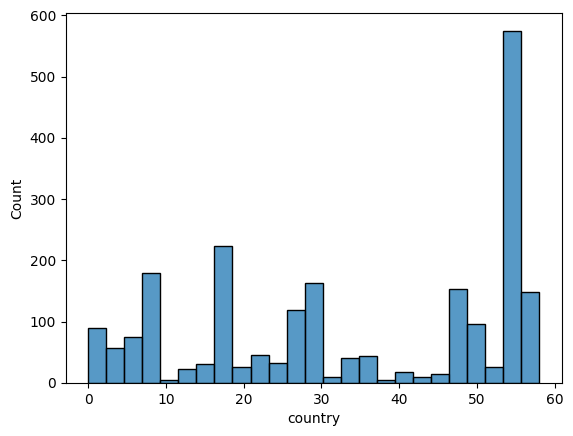

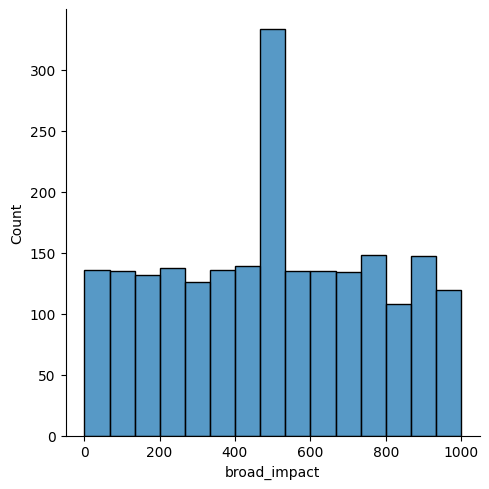

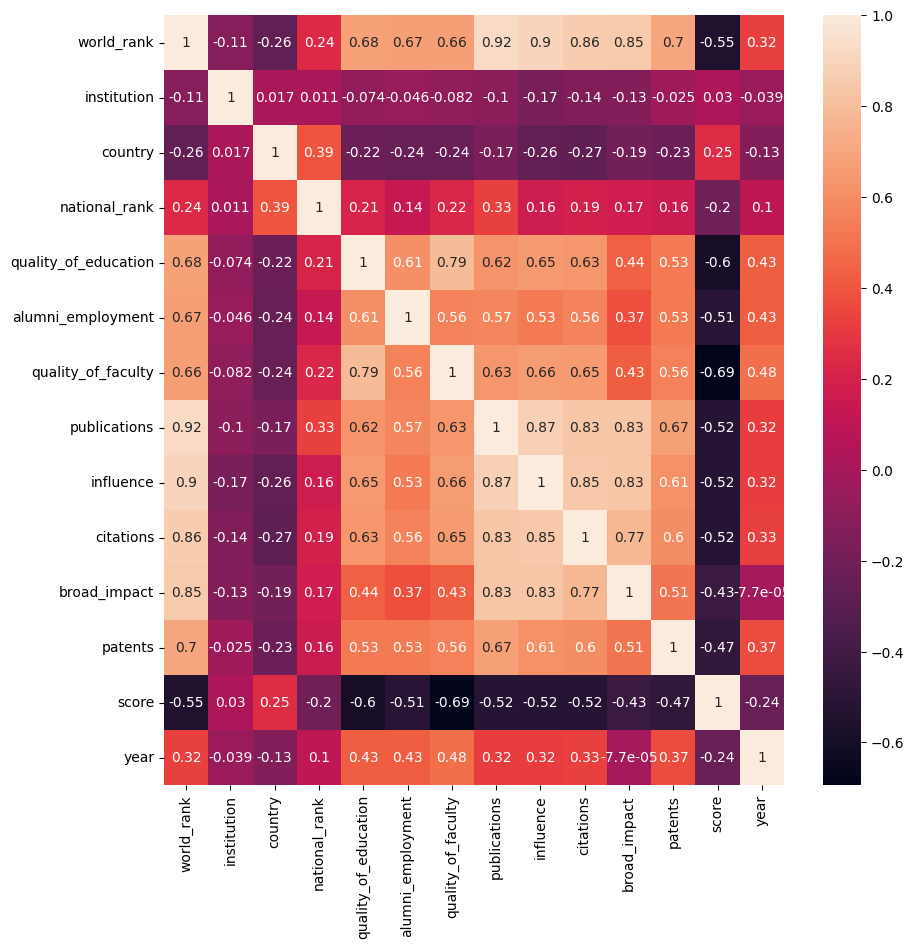

In [15]:
# Visualizations
sns.histplot(df['country'], bins=25)
sns.displot(df['broad_impact'])
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [16]:
# Defining features and target
X = df.drop('world_rank', axis=1)
y = df['world_rank']

In [17]:
X.dtypes

institution               int64
country                   int64
national_rank             int64
quality_of_education      int64
alumni_employment         int64
quality_of_faculty        int64
publications              int64
influence                 int64
citations                 int64
broad_impact            float64
patents                   int64
score                   float64
year                      int64
dtype: object

In [18]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [19]:
# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
# Linear Regression
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)
print("Linear Regression Score:", LR.score(X_test, y_test))
y_predLR = LR.predict(X_test)

Linear Regression Score: 0.9273812617543402


Linear Regression MAE: 54.55973399948955
Linear Regression MSE: 6612.627332125607
Linear Regression RMSE: 81.31806276667938


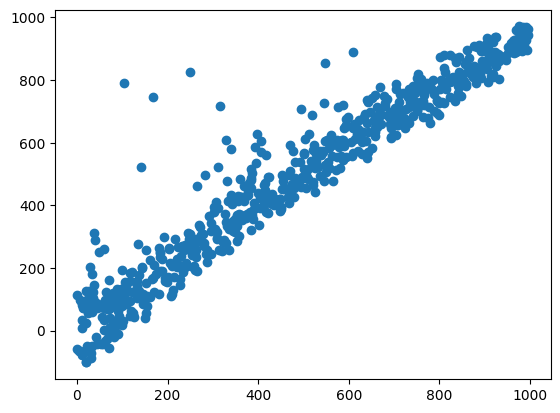

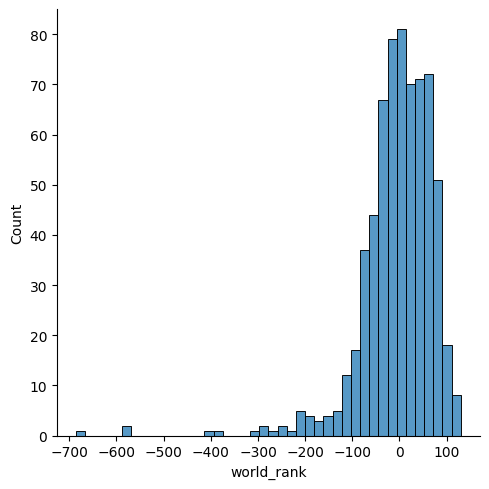

In [22]:
# Evaluation
from sklearn import metrics
print('Linear Regression MAE:', metrics.mean_absolute_error(y_test, y_predLR))
print('Linear Regression MSE:', metrics.mean_squared_error(y_test, y_predLR))
print('Linear Regression RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predLR)))
plt.scatter(y_test, y_predLR)
sns.displot(y_test - y_predLR)

In [25]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor()
RFR.fit(X_train, y_train)
print("Random Forest Score:", RFR.score(X_test, y_test))
y_predRFR = RFR.predict(X_test)

Random Forest Score: 0.9974660080062204


Linear Regression MAE: 7.178424242424243
Linear Regression MSE: 230.7440906060607
Linear Regression RMSE: 15.190263019647182


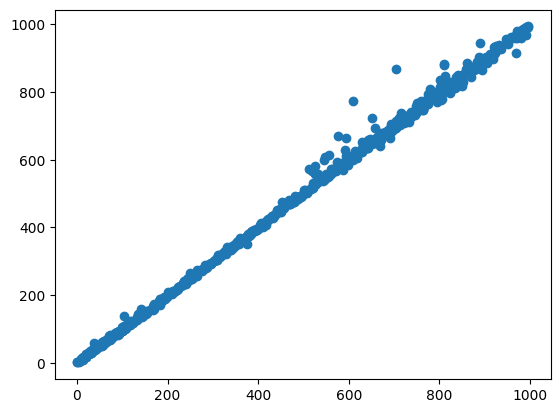

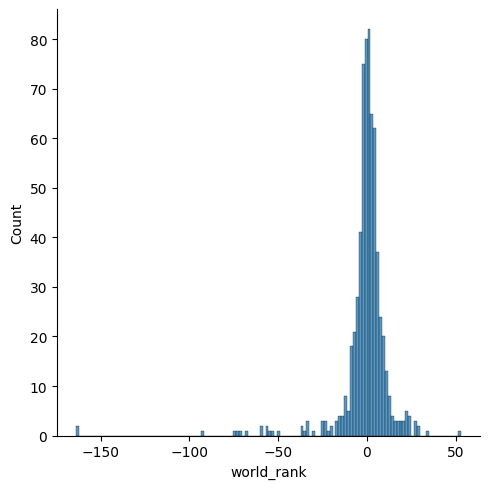

In [26]:
# Evaluation
from sklearn import metrics
print('Linear Regression MAE:', metrics.mean_absolute_error(y_test, y_predRFR))
print('Linear Regression MSE:', metrics.mean_squared_error(y_test, y_predRFR))
print('Linear Regression RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predRFR)))
plt.scatter(y_test, y_predRFR)
sns.displot(y_test - y_predRFR)

In [27]:
# XGBoost Regressor
from xgboost import XGBRegressor
XGB = XGBRegressor()
XGB.fit(X_train, y_train)
print("XGBoost Score:", XGB.score(X_test, y_test))
y_predXGB = XGB.predict(X_test)

XGBoost Score: 0.9979450702667236


XGBoost MAE: 7.836967468261719
XGBoost MSE: 187.12269592285156
XGBoost RMSE: 13.6792798027839


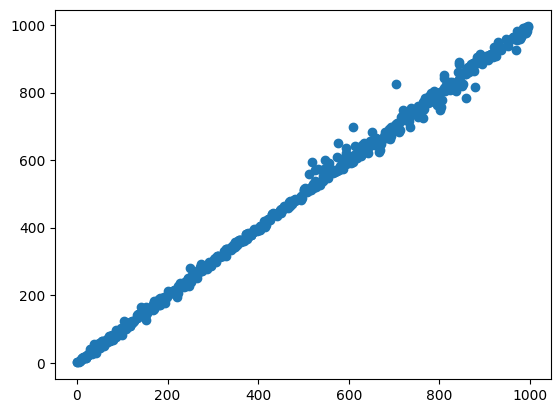

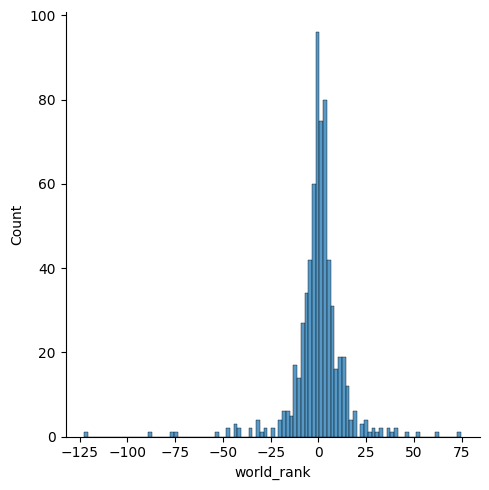

In [28]:
print('XGBoost MAE:', metrics.mean_absolute_error(y_test, y_predXGB))
print('XGBoost MSE:', metrics.mean_squared_error(y_test, y_predXGB))
print('XGBoost RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predXGB)))
plt.scatter(y_test, y_predXGB)
sns.displot(y_test - y_predXGB)

In [32]:
# Collecting metrics for all models
results = {
    "Model": ["Linear Regression", "Random Forest", "XGBoost"],
    "MAE": [
        metrics.mean_absolute_error(y_test, y_predLR),
        metrics.mean_absolute_error(y_test, y_predRFR),
        metrics.mean_absolute_error(y_test, y_predXGB)
    ],
    "MSE": [
        metrics.mean_squared_error(y_test, y_predLR),
        metrics.mean_squared_error(y_test, y_predRFR),
        metrics.mean_squared_error(y_test, y_predXGB)
    ],
    "RMSE": [
        np.sqrt(metrics.mean_squared_error(y_test, y_predLR)),
        np.sqrt(metrics.mean_squared_error(y_test, y_predRFR)),
        np.sqrt(metrics.mean_squared_error(y_test, y_predXGB))
    ]
}

# Creating the DataFrame
metrics_df = pd.DataFrame(results)
print("\nModel Comparison Table:")
print(metrics_df)




Model Comparison Table:
               Model        MAE          MSE       RMSE
0  Linear Regression  54.559734  6612.627332  81.318063
1      Random Forest   7.178424   230.744091  15.190263
2            XGBoost   7.836967   187.122696  13.679280


Observations
1. XGBoost performs the best among the three models with the lowest MAE, MSE, and RMSE values.

2. Random Forest also shows strong performance and is better than Linear Regression in all metrics.

3. Linear Regression is the simplest but gives the highest error values, indicating it may not capture complex patterns well.

4. RMSE, being more sensitive to outliers, shows that both tree-based models (Random Forest and XGBoost) handle variance in the data better.